In [18]:
import pandas as pd

combine_df = pd.read_csv('2_combine_all.csv')

In [19]:
combine_df.columns

Index(['id', 'promoType', 'price', 'hasVideo', 'agentNames', 'brandName',
       'addressStreet', 'addressSuburb', 'addressState', 'addressPostcode',
       'addressLat', 'addressLng', 'num_bath', 'type', 'formatted', 'isRural',
       'landSize', 'Retirement', 'postcode', '2023_population',
       'ERP_2023_change_number', 'natural_2023_increase_number',
       'internal_2023_migration_number', 'overseas_2023_migration_number',
       'area_in_square_kilometers', 'estimated_2024_population', 'IEO_Score',
       'IEO_State Rank', 'IEO_State Decile', 'IEO_State Percentile',
       'IER_Usual Resident Population', 'IER_Score', 'IER_State Rank',
       'IER_State Decile', 'IER_State Percentile',
       'ERP_2023_change_percentage(%)', 'population_density_2023',
       'nearest_station', 'min_walking_distance_to_station',
       'min_distance_to_university', 'min_distance_to_shopping_mall',
       'min_distance_to_secondary_school', 'min_distance_to_primary_school',
       'min_distance_to

In [20]:
df = combine_df.copy()

# Calculate the growth rate
df['2023_growth_rate'] = df['natural_2023_increase_number'] / df['2023_population'] * 100


# Calculate the growth rate
df['2024_growth_rate'] = (df['estimated_2024_population'] - df['2023_population']) / df['2023_population'] * 100

# Assuming df is your DataFrame and you've already calculated 2024_growth_rate

# Step 1: Calculate the growth factor (1 + growth_rate/100)
df['2025_growth_factor'] = 1.12 + (df['2024_growth_rate'] / 100)

# Step 2: Estimate population for 2025 and 2026
df['estimated_2025_population'] = df['estimated_2024_population'] * df['2025_growth_factor']


# Step 3: Calculate growth rates for 2025 and 2026
df['2025_growth_rate'] = (df['estimated_2025_population'] - df['estimated_2024_population']) / df['estimated_2024_population'] * 100

df['2026_growth_factor'] = 0.87 + (df['2025_growth_rate'] / 100)
df['estimated_2026_population'] = df['estimated_2025_population'] * df['2026_growth_factor']
df['2026_growth_rate'] = (df['estimated_2026_population'] - df['estimated_2025_population']) / df['estimated_2025_population'] * 100


# Select only the relevant columns
result_df=df[['addressSuburb', '2023_population', 
              'estimated_2024_population', '2024_growth_rate',
              '2025_growth_rate', '2026_growth_rate']]


result = result_df.groupby('addressSuburb').mean().sort_values('2024_growth_rate', ascending=False).head(10)

result


,2023_population,estimated_2024_population,2024_growth_rate,2025_growth_rate,2026_growth_rate
addressSuburb,,,,,
CARLTON,21376.000000,25309.000000,18.399139,30.399139,17.399139
MELBOURNE,39819.516949,45509.381356,12.532195,24.532195,11.532195
MANOR LAKES,80341.000000,90071.000000,12.110877,24.110877,11.110877
MAMBOURIN,80341.000000,90071.000000,12.110877,24.110877,11.110877
MOUNT COTTRELL,80341.000000,90071.000000,12.110877,24.110877,11.110877
WYNDHAM VALE,80341.000000,90071.000000,12.110877,24.110877,11.110877
WEST MELBOURNE,8724.000000,9483.000000,8.700138,20.700138,7.700138
MELBOURNE 3004,13186.000000,14188.000000,7.598969,19.598969,6.598969
FOOTSCRAY,29532.000000,31749.000000,7.507111,19.507111,6.507111


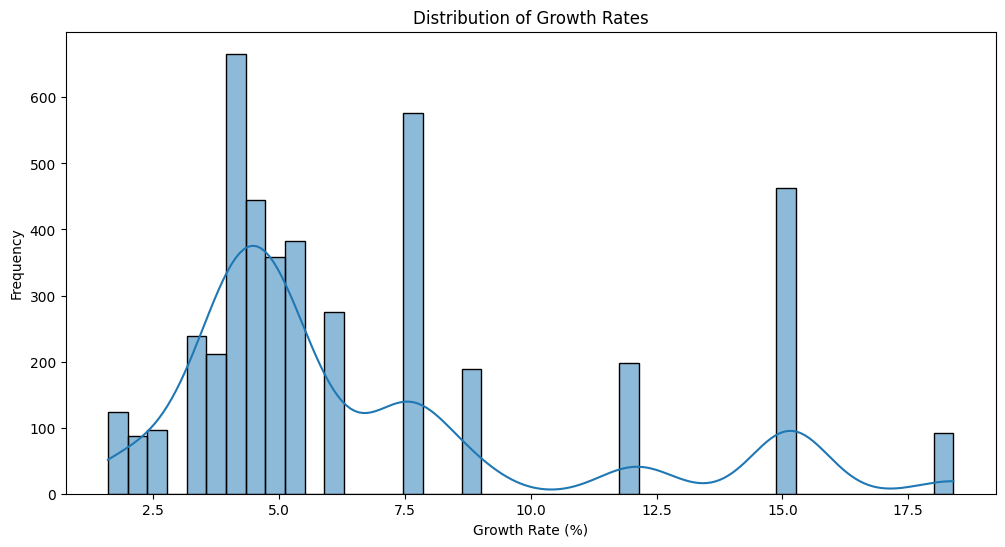

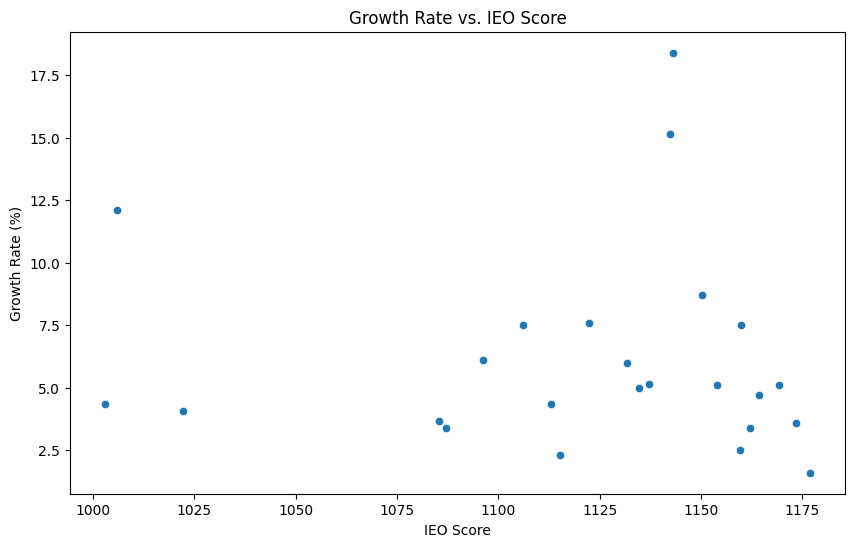

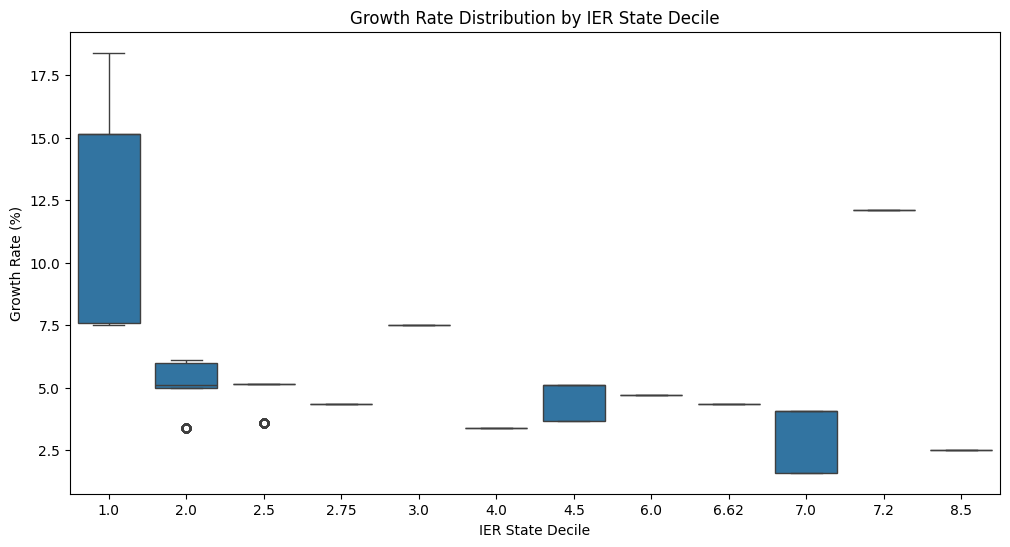

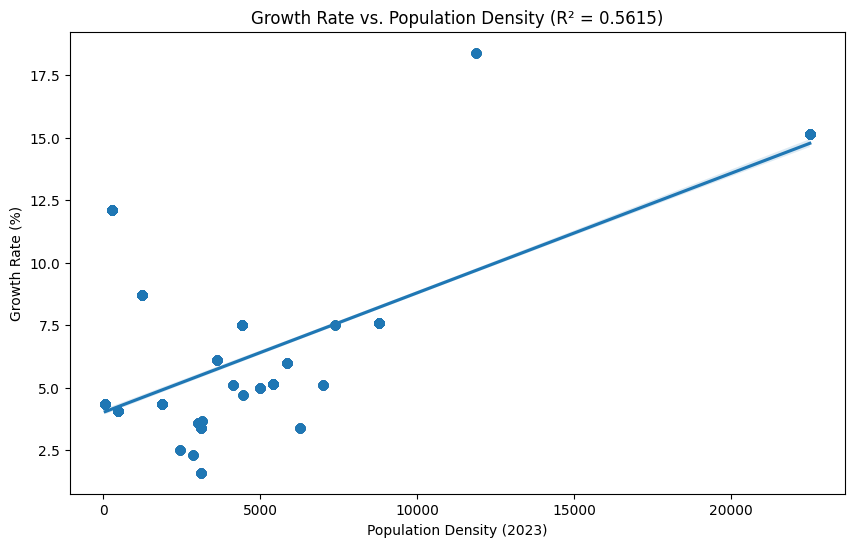


Correlation Matrix:
                                  2024_growth_rate  IEO_Score  IER_Score  \
2024_growth_rate                          1.000000   0.093709  -0.788130   
IEO_Score                                 0.093709   1.000000  -0.496910   
IER_Score                                -0.788130  -0.496910   1.000000   
population_density_2023                   0.749319   0.390249  -0.864239   
min_distance_to_university               -0.026804  -0.589292   0.305473   
min_distance_to_shopping_mall            -0.055395  -0.825636   0.460903   
min_distance_to_secondary_school         -0.061650  -0.561004   0.324443   
min_distance_to_primary_school           -0.031539  -0.457949   0.248639   
min_distance_to_park                      0.012706  -0.350764   0.150398   

                                  population_density_2023  \
2024_growth_rate                                 0.749319   
IEO_Score                                        0.390249   
IER_Score                          

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Correlation analysis
correlation_columns = ['2024_growth_rate', 'IEO_Score', 'IER_Score', 'population_density_2023', 
                    'min_distance_to_university', 
                       'min_distance_to_shopping_mall', 'min_distance_to_secondary_school', 
                       'min_distance_to_primary_school', 'min_distance_to_park']

correlation_matrix = df[correlation_columns].corr()

# 3. Growth rate distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['2024_growth_rate'], kde=True)
plt.title('Distribution of Growth Rates')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter plot: Growth Rate vs. IEO Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IEO_Score', y='2024_growth_rate', data=df)
plt.title('Growth Rate vs. IEO Score')
plt.xlabel('IEO Score')
plt.ylabel('Growth Rate (%)')
plt.show()

# 5. Box plot: Growth Rate by IER State Decile
plt.figure(figsize=(12, 6))
sns.boxplot(x='IER_State Decile', y='2024_growth_rate', data=df)
plt.title('Growth Rate Distribution by IER State Decile')
plt.xlabel('IER State Decile')
plt.ylabel('Growth Rate (%)')
plt.show()

# 6. Regression analysis: Growth Rate vs. Population Density
slope, intercept, r_value, p_value, std_err = stats.linregress(df['population_density_2023'], df['2024_growth_rate'])

plt.figure(figsize=(10, 6))
sns.regplot(x='population_density_2023', y='2024_growth_rate', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Growth Rate vs. Population Density (R² = {r_value**2:.4f})')
plt.xlabel('Population Density (2023)')
plt.ylabel('Growth Rate (%)')
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

print(f"\nRegression Analysis - Growth Rate vs. Population Density:")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")


In [22]:
df = df.drop(columns=['agentNames', 'brandName', 'addressStreet', 
                              'addressSuburb', 'addressState',
                              'id'])

# 2025_growth_rate	2026_growth_rate

In [23]:
numeric_features = df.select_dtypes(exclude=['object']).columns.to_list()
numeric_features

['price',
 'hasVideo',
 'addressPostcode',
 'addressLat',
 'addressLng',
 'num_bath',
 'isRural',
 'landSize',
 'Retirement',
 'postcode',
 '2023_population',
 'ERP_2023_change_number',
 'natural_2023_increase_number',
 'internal_2023_migration_number',
 'overseas_2023_migration_number',
 'area_in_square_kilometers',
 'estimated_2024_population',
 'IEO_Score',
 'IEO_State Rank',
 'IEO_State Decile',
 'IEO_State Percentile',
 'IER_Usual Resident Population',
 'IER_Score',
 'IER_State Rank',
 'IER_State Decile',
 'IER_State Percentile',
 'ERP_2023_change_percentage(%)',
 'population_density_2023',
 'min_walking_distance_to_station',
 'min_distance_to_university',
 'min_distance_to_shopping_mall',
 'min_distance_to_secondary_school',
 'min_distance_to_primary_school',
 'min_distance_to_park',
 'medical_institution_count',
 '2023_growth_rate',
 '2024_growth_rate',
 '2025_growth_factor',
 'estimated_2025_population',
 '2025_growth_rate',
 '2026_growth_factor',
 'estimated_2026_population',


In [24]:
features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
       'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', '2024_growth_rate',
       ]

target = 'price'
df = df.dropna()
data_2024 = df[features+[target]]
data_2024 = data_2024.rename(columns={'2024_growth_rate' : 'growth_rate'})


In [25]:
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# instantiate model with 200 decision trees
rf = RandomForestRegressor(random_state=42)

gb = GradientBoostingRegressor(random_state=42)

In [26]:
train_features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
                  'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', 'growth_rate']
x_train = data_2024[train_features]
y_train = data_2024[target]


# split the data into two groups that are training set and the testing set
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, 
                                                                            test_size=0.3, shuffle=True)

In [27]:

# train the model on training data
rf.fit(x_train_split, y_train_split)
rf.score(x_test_split, y_test_split)# calculate the r squared

0.5592669951880508

In [28]:
# train the model on training data
gb.fit(x_train_split, y_train_split)
gb.score(x_test_split, y_test_split)# calculate the r squared

0.49469502174876534

In [29]:
features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
            'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', '2025_growth_rate',
       ]
data_2025 = df[features+[target]]
data_2025 = data_2025.rename(columns={'2025_growth_rate' : 'growth_rate'})

predict_features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
                    'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', 'growth_rate',
       ]
predict_2025 = data_2025[predict_features]


features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
            'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', '2026_growth_rate',
       ]
data_2026 = df[features+[target]]
data_2026 = data_2026.rename(columns={'2026_growth_rate' : 'growth_rate'})
predict_2026 = data_2026[predict_features]




In [30]:
df['Pred_2024'] = rf.predict(x_train)
df['Pred_2025'] = rf.predict(predict_2025)
df['Pred_2026'] = rf.predict(predict_2026)


In [31]:
df

,promoType,price,hasVideo,addressPostcode,addressLat,addressLng,num_bath,type,formatted,isRural,...,2024_growth_rate,2025_growth_factor,estimated_2025_population,2025_growth_rate,2026_growth_factor,estimated_2026_population,2026_growth_rate,Pred_2024,Pred_2025,Pred_2026
0,premiumplus,500.0,False,3003,-37.810738,144.95226,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,526.45,447.365,526.45
1,premiumplus,540.0,True,3003,-37.810135,144.95040,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,632.65,475.925,630.65
2,standardpp,650.0,False,3003,-37.810757,144.95224,2.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,700.94,662.290,702.69
3,premiumplus,560.0,False,3003,-37.810860,144.95183,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,549.30,450.705,550.30
4,standardpp,600.0,False,3003,-37.807606,144.94562,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,696.55,480.190,687.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,standard,500.0,False,3024,-37.863820,144.58377,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,505.60,505.600,505.60
4397,standard,500.0,False,3024,-37.860850,144.59560,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,505.90,505.900,505.90
4398,elite,510.0,False,3024,-37.852295,144.59398,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,502.35,502.350,502.35
4399,elite,520.0,False,3024,-37.873215,144.60631,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,515.30,515.300,515.30
